## PROBLEM STATEMENT
# 6.1

In [70]:
from pylab import plot,show
from numpy import vstack, array
from numpy.random import rand
from scipy.cluster.vq import kmeans, vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [71]:
df = pd.DataFrame()
# Large Caps
Asian_paint = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Large_Cap\ASIANPAINT.csv')
df['Asian_paint'] = Asian_paint['Close Price']
Titan = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Large_Cap\TITAN.csv')
df['Titan'] = Titan['Close Price']
Bajfinance = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Large_Cap\BAJFINANCE.csv')
df['Bajfinance'] = Bajfinance['Close Price']
Gail = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Large_Cap\GAIL.csv')
df['Gail'] = Gail['Close Price']
Hdfc = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Large_Cap\HDFC.csv')
df['Hdfc'] = Hdfc['Close Price']
Hindalco = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Large_Cap\HINDALCO.csv')
df['Hindalco'] = Hindalco['Close Price']
Hindunilvr = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Large_Cap\HINDUNILVR.csv')
df['Hindunilvr'] = Hindunilvr['Close Price']
Ioc = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Large_Cap\IOC.csv')
df['Ioc'] = Ioc['Close Price']
Tcs = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Large_Cap\TCS.csv')
df['Tcs'] = Tcs['Close Price']
Infratel = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Large_Cap\INFRATEL.csv')
df['Infratel'] = Infratel['Close Price']

# Mid Caps
Adani_power = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Mid_Cap\ADANIPOWER.csv')
df['Adani_power'] = Adani_power['Close Price']
Dhfl = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Mid_Cap\DHFL.csv')
df['Dhfl'] = Dhfl['Close Price']
Idbi = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Mid_Cap\IDBI.csv')
df['Idbi'] = Idbi['Close Price']
Igl = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Mid_Cap\IGL.csv')
df['Igl'] = Igl['Close Price']
Mrpl = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Mid_Cap\MRPL.csv')
df['Mrpl'] = Mrpl['Close Price']
TataPower = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Mid_Cap\TATAPOWER.csv')
df['TataPower'] = TataPower['Close Price']
Pnb = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Mid_Cap\PNB.csv')
df['Pnb'] = Pnb['Close Price']
suntv = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Mid_Cap\SUNTV.csv')
df['suntv'] = suntv['Close Price']
Voltas = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Mid_Cap\VOLTAS.csv')
df['Voltas'] = Voltas['Close Price']
Rblbank = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Mid_Cap\RBLBANK.csv')
df['Rblbank'] = Rblbank['Close Price']

#Small Caps
Ashoka = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Small_Cap\ASHOKA.csv')
df['Ashoka'] = Ashoka['Close Price']
BajajElec = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Small_Cap\BAJAJELEC.csv')
df['BajajElec'] = BajajElec['Close Price']
Fortis = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Small_Cap\FORTIS.csv')
df['Fortis'] = Fortis['Close Price']
Idfc = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Small_Cap\IDFC.csv')
df['Idfc'] = Idfc['Close Price']
Ircon = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Small_Cap\IRCON.csv')
df['Ircon'] = Ircon['Close Price']
Itdc = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Small_Cap\ITDC.csv')
df['Itdc'] = Itdc['Close Price']
Pvr = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Small_Cap\PVR.csv')
df['Pvr'] = Pvr['Close Price']
Rcom = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Small_Cap\RCOM.csv')
df['Rcom'] = Rcom['Close Price']
Suzlon = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Small_Cap\SUZLON.csv')
df['Suzlon'] = Suzlon['Close Price']
Luxind = pd.read_csv('D:\codes\Machine-learning\internship\Stocks\Small_Cap\LUXIND.csv')
df['Luxind'] = Luxind['Close Price']

df['Date'] = Titan['Date']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df

,Asian_paint,Titan,Bajfinance,Gail,Hdfc,Hindalco,Hindunilvr,Ioc,Tcs,Infratel,...,Ashoka,BajajElec,Fortis,Idfc,Ircon,Itdc,Pvr,Rcom,Suzlon,Luxind
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,1148.05,483.65,1332.95,414.00,1559.50,198.45,983.25,442.10,2365.10,371.05,...,216.05,341.15,205.25,63.70,415.3,650.15,1524.95,32.00,19.60,819.60
2017-05-16,1142.85,488.30,1347.75,411.40,205.00,196.50,1000.40,446.60,2429.15,376.55,...,214.90,347.00,207.90,64.25,427.0,636.70,1539.00,32.10,19.70,817.50
2017-05-17,1154.95,481.75,1324.80,408.30,1566.55,198.85,1009.40,444.25,2455.35,389.90,...,217.00,349.85,205.90,63.35,421.4,626.75,1530.30,31.95,19.90,819.80
2017-05-18,1151.35,471.65,1314.55,404.75,1552.50,194.00,990.25,439.90,2536.20,378.90,...,209.65,334.10,196.85,61.50,407.1,604.65,1515.05,31.05,20.00,820.05
2017-05-19,1123.15,471.15,1289.15,401.05,207.00,191.00,1008.00,435.40,2507.15,378.95,...,206.25,336.20,203.55,61.15,399.8,594.30,1513.55,30.55,20.60,817.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-06,1387.80,1082.85,3017.05,337.50,1875.10,200.45,1697.50,153.45,2215.40,266.70,...,115.45,534.45,135.20,37.10,NaN,251.95,1780.10,2.20,5.95,1268.50
2019-05-07,1385.70,1086.50,2921.30,340.40,399.05,200.00,1688.70,152.20,2132.00,267.10,...,115.30,531.85,133.60,37.60,NaN,246.25,1748.50,2.30,5.65,1248.20
2019-05-08,1354.20,1088.70,2971.35,341.55,1853.00,198.15,1703.75,150.60,2157.85,262.25,...,117.45,540.90,133.00,37.60,NaN,251.15,1758.45,2.40,6.40,1239.95


## PROBLEM STATEMENT
# 6.2

In [72]:
df = df.dropna()
returns = df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = df.pct_change().std() * sqrt(252)
returns

,Returns,Volatility
Asian_paint,0.001428,0.188060
Titan,1.014747,0.429079
Bajfinance,0.509863,0.303276
Gail,0.343332,0.284225
Hdfc,545.109735,48.925656
Hindalco,0.428701,0.293251
Hindunilvr,0.527013,0.184322
Ioc,-0.090250,0.277190
Tcs,0.165402,0.195432
Infratel,-0.008249,0.326391


## PROBLEM STATEMENT
# 6.3

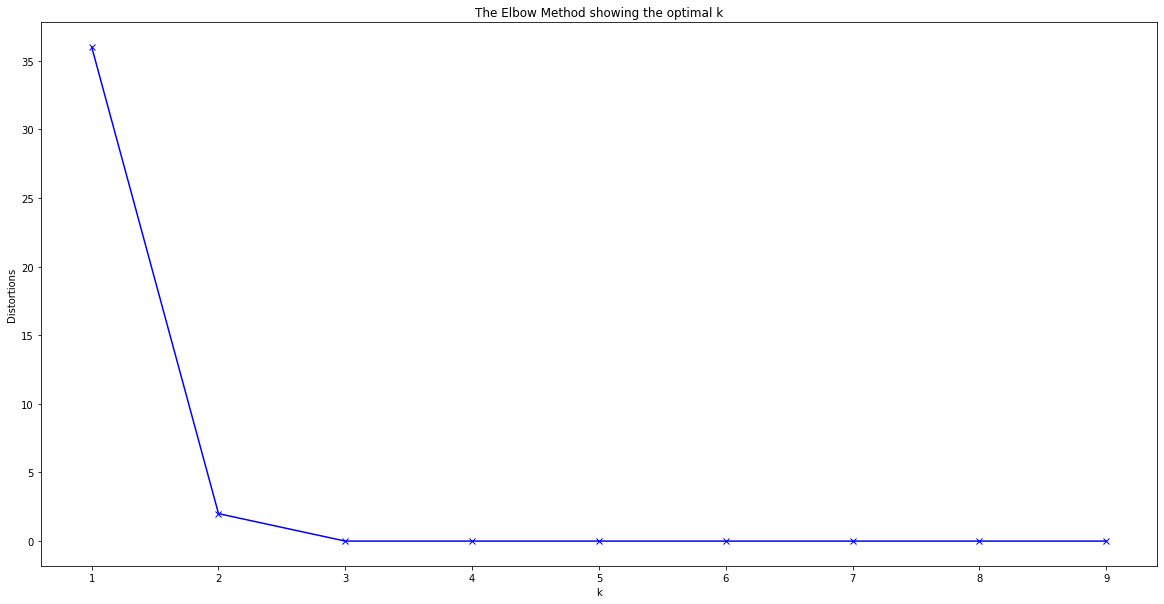

In [73]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


data = np.asarray([np.asarray(returns['Returns']), np.asarray(returns['Volatility'])]).T
X = data
distortions = []
K = range(1,10)
for k in K:
    KmeanModel = KMeans(n_clusters=k).fit(X)
    KmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, KmeanModel.cluster_centers_, 'euclidean'),axis=1)) // X.shape[0])
    
    
#plot
plt.figure(figsize=(20,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## PROBLEM STATEMENT
# 6.4

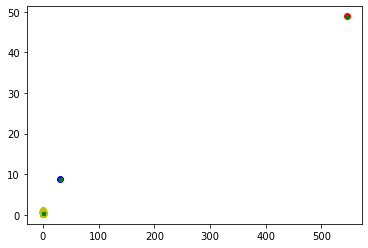

In [74]:
# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(X,3)
idx,_ = vq(data,centroids)

plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=3)

In [75]:
#identify outlier
print(returns.idxmax())

Returns       Hdfc
Volatility    Hdfc
dtype: object


In [76]:
#drop relevent stocks
returns.drop('Hdfc',inplace=True)
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

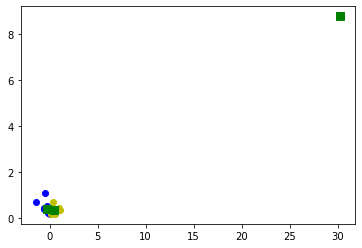

In [77]:
#computing K-Means

centroids,_ = kmeans(data,3)
idx,_ = vq(data,centroids)
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

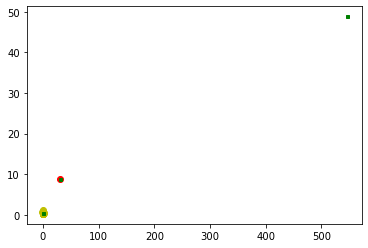

In [78]:
centroids,_ = kmeans(X,3)
idx,_ = vq(data,centroids)

plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=3)

In [79]:
print(returns.idxmax())

Returns       Dhfl
Volatility    Dhfl
dtype: object


In [80]:
returns.drop('Dhfl',inplace=True)
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

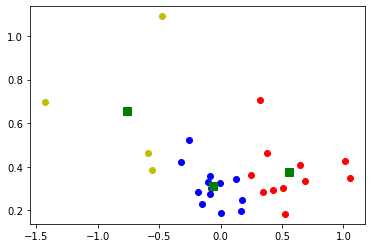

In [81]:
centroids,_ = kmeans(data,3)
idx,_ = vq(data,centroids)

plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()